<a href="https://colab.research.google.com/github/EvelynAnyebe/dsp/blob/main/audio_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fftpack import fft

In [2]:
from IPython.display import Audio
Audio('original.wav')

Task 1: #Read the audio files

In [3]:
sample_rate1, audio_data1 = wavfile.read('original.wav')

In [4]:
sample_rate1

44100

In [5]:
audio_data1

array([[ 180,  180],
       [ 173,  173],
       [ 198,  199],
       ...,
       [-237, -242],
       [-224, -223],
       [-232, -231]], dtype=int16)

In [7]:
mono_audio1 = np.mean(audio_data1, axis=1)
mono_audio1

array([ 180. ,  173. ,  198.5, ..., -239.5, -223.5, -231.5])

Normalize audio 1 to get normalized amplitudes

In [9]:
max_audio_data1 = np.max(np.abs(mono_audio1))
max_audio_data1

15904.0

In [10]:
normalized_audio1=np.array(mono_audio1 / max_audio_data1)
normalized_audio1

array([ 0.01131791,  0.01087777,  0.01248114, ..., -0.0150591 ,
       -0.01405307, -0.01455609])

Generate t (time for x-axis)

In [11]:
duration_audio1=len(mono_audio1)/sample_rate1
duration_audio1

2.159455782312925

In [12]:
audio1_time=np.linspace(0,duration_audio1, num=len(mono_audio1))
audio1_time

array([0.00000000e+00, 2.26759751e-05, 4.53519501e-05, ...,
       2.15941043e+00, 2.15943311e+00, 2.15945578e+00])

Plot the audio signal in time domain

Text(0.5, 1.0, 'Audio in the time domain')

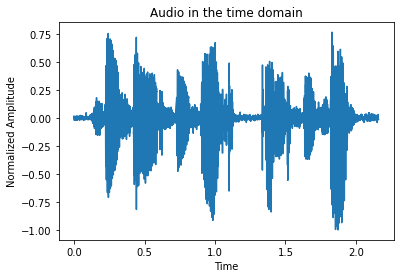

In [13]:
plt.plot(audio1_time,normalized_audio1)
plt.ylabel("Normalized Amplitude")
plt.xlabel("Time")
plt.title("Audio in the time domain")

This visualization is called the time-domain representation of a given signal. This shows us the loudness (amplitude) of sound wave changing with time. Here amplitude = 0 represents silence. (From the definition of sound waves â€” This amplitude is actually the amplitude of air particles which are oscillating because of the pressure change in the atmosphere due to sound).
These amplitudes are not very informative, as they only talk about the loudness of audio recording. To better understand the audio signal, it is necessary to transform it into the frequency-domain. The frequency-domain representation of a signal tells us what different frequencies are present in the signal. Fourier Transform is a mathematical concept that can convert a continuous signal from time-domain to frequency-domain.

Take fft of the data



In [15]:
data_fft=np.fft.fft(mono_audio1)
data_fft

array([-116585.           +0.j        ,  -57924.6071472 +2839.3998027j ,
        -62408.44441223-4312.11592246j, ...,
        -53411.5535268 -6510.3997303j ,  -62408.44441223+4312.11592246j,
        -57924.6071472 -2839.3998027j ])

In [17]:
frequencies = np.abs(data_fft)
frequencies

array([116585.        ,  57994.15750226,  62557.24001011, ...,
        53806.87088834,  62557.24001011,  57994.15750226])

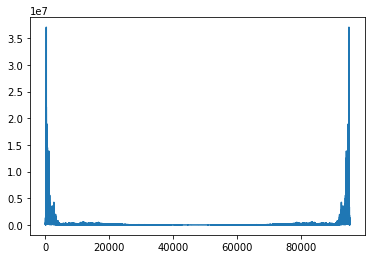

In [19]:
plt.plot(frequencies)